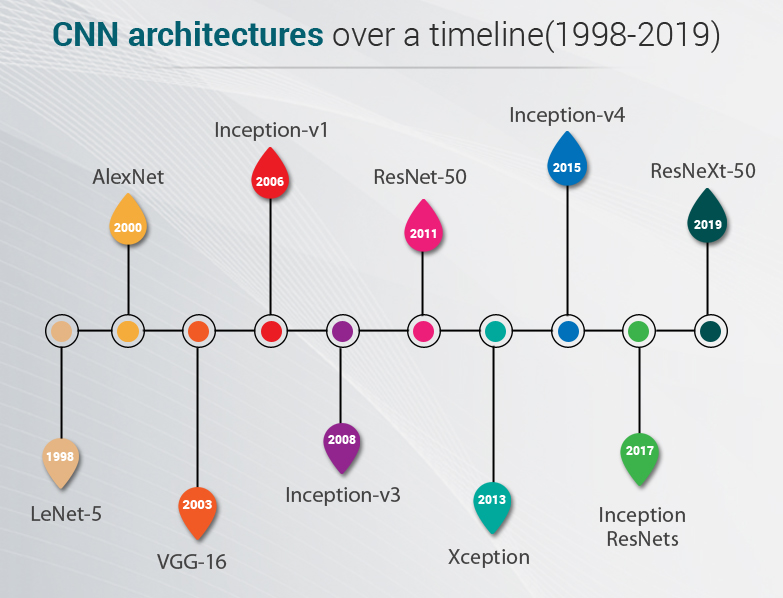

In [74]:
# INPUT - CONV - POOLING - FC - OUTPUT

In [75]:
# LeNet - 5: INPUT - CONV1 - POOLING - CONV - POOLING - FC - FC - OUTPUT

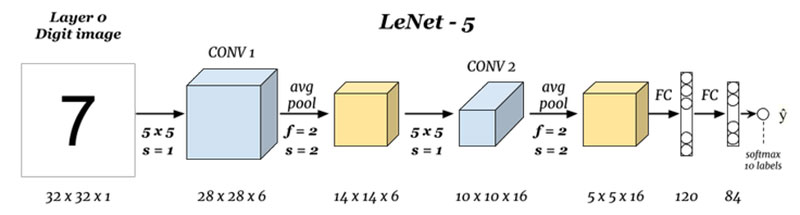

In [ ]:
# AlexNet - INPUT - CONV1 - POOLING1 - CONV2 - POOLING2 - CONV3 - CONV 4 - CONV5 - POOLING5 - FC - FC - FC

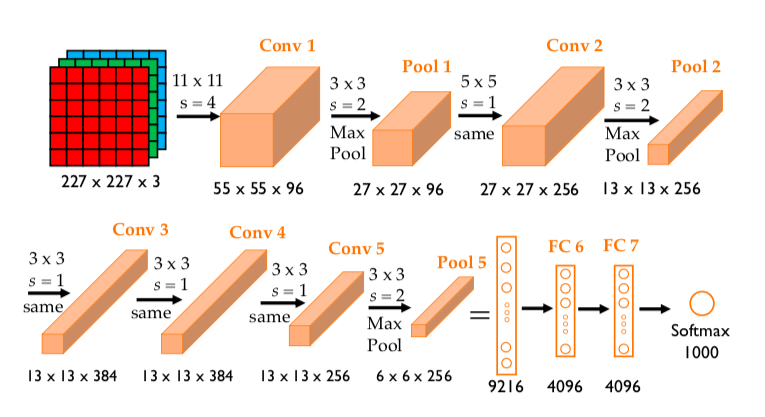

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root = r"C:\Users\mahdis\Desktop\Image", train = True, download = True, transform = transform)

In [6]:
test_data = datasets.MNIST(root = r"C:\Users\mahdis\Desktop\Image", train = False, download = True, transform = transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\mahdis\Desktop\Image
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\mahdis\Desktop\Image
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
10000/60000

0.16666666666666666

In [10]:
type(train_data), type(test_data)

(torchvision.datasets.mnist.MNIST, torchvision.datasets.mnist.MNIST)

In [11]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
type(train_data[0])

tuple

In [13]:
test_data[0][0].shape

torch.Size([1, 28, 28])

In [14]:
test_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

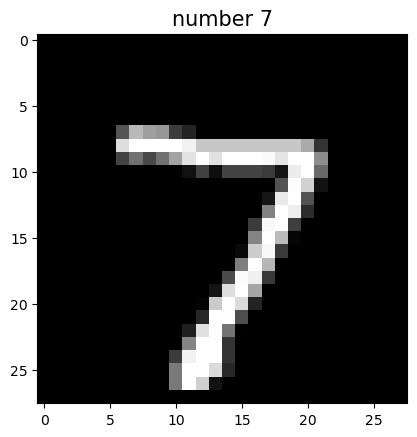

In [15]:
plt.imshow(test_data[0][0].view(28, 28), cmap = 'gray')
plt.title(f'number {test_data[0][1]}', size = 15)
plt.show()

In [16]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True) 
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [17]:
# 1 Channel input, 6 FILTERS (Output channels), 3by3 KERNELS, STRIDE = 1
conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 3, stride = 1) # ---> 6 filters ---> pooling ---> conv2
conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3, stride = 1)


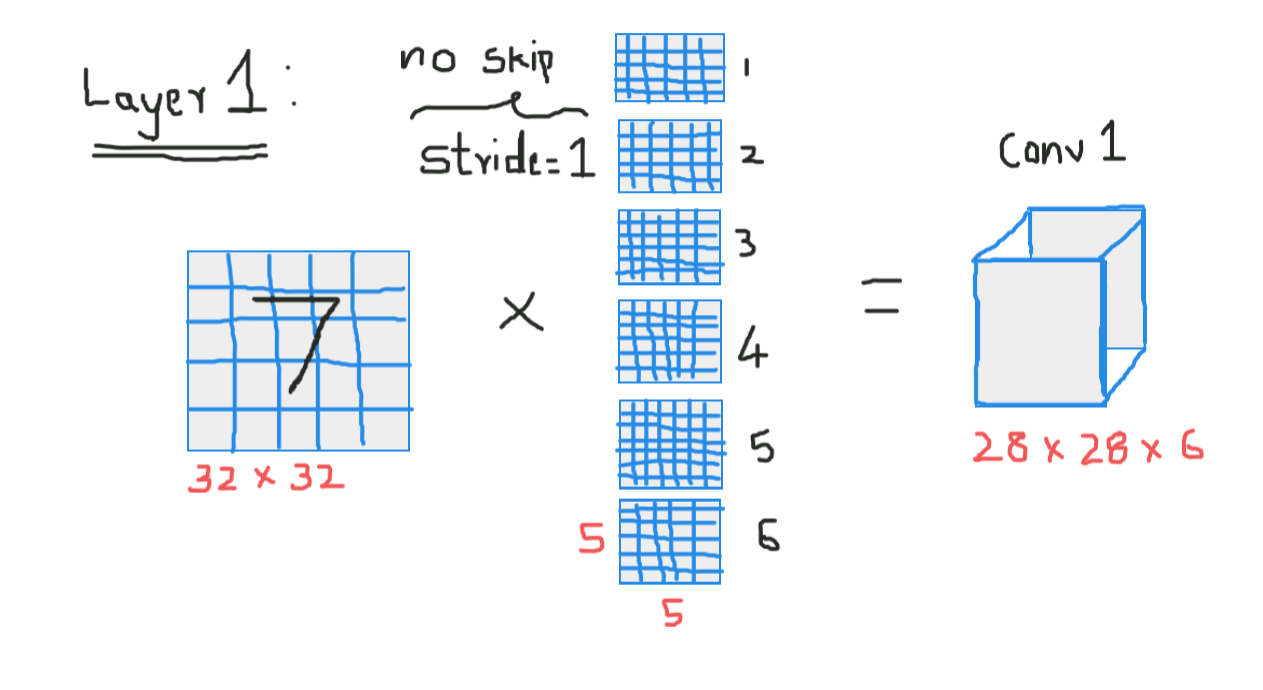

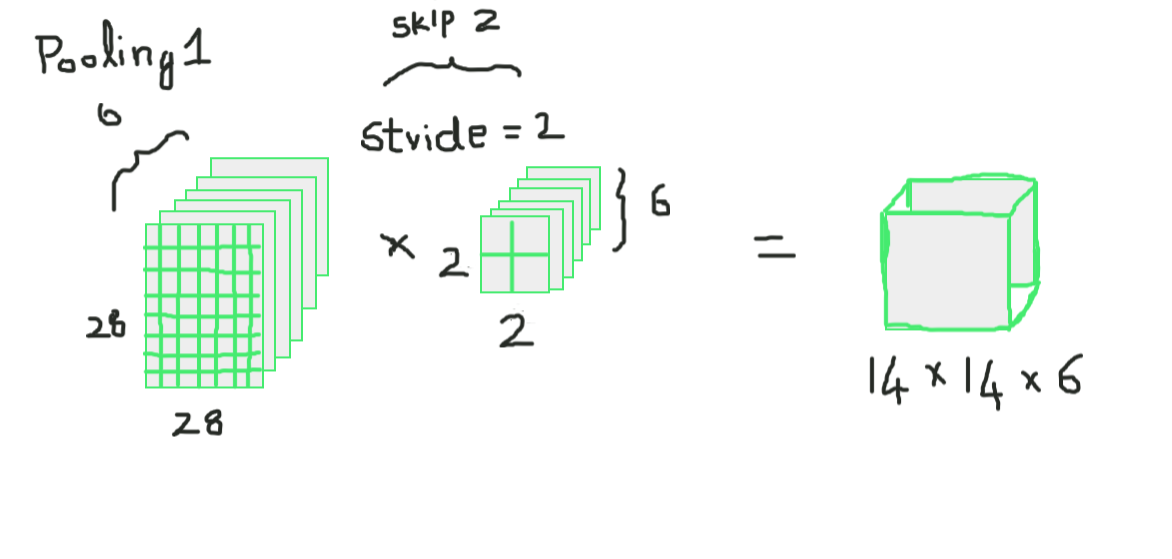

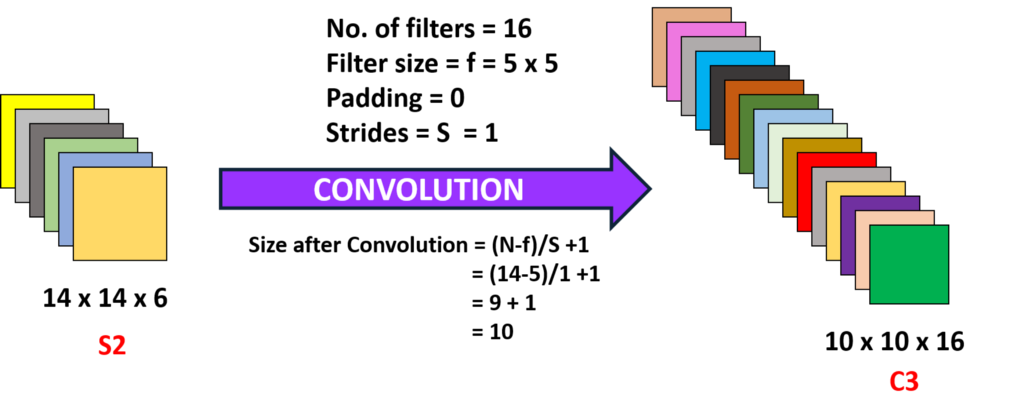

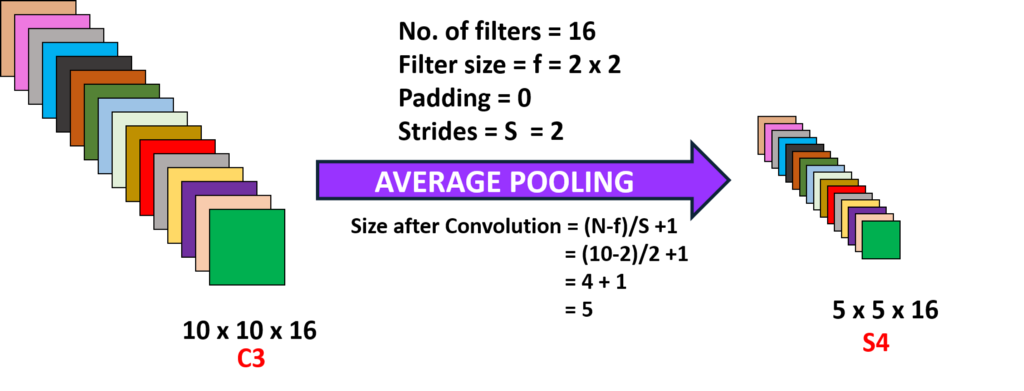

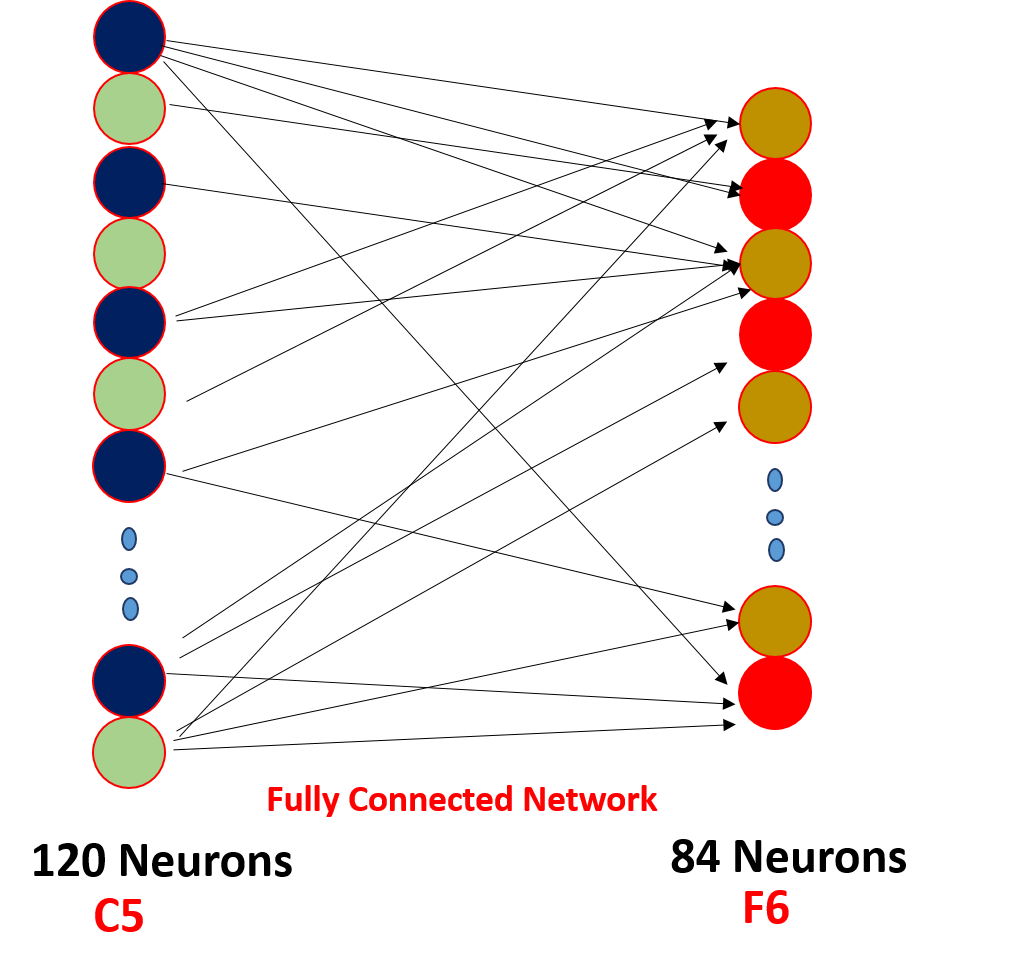

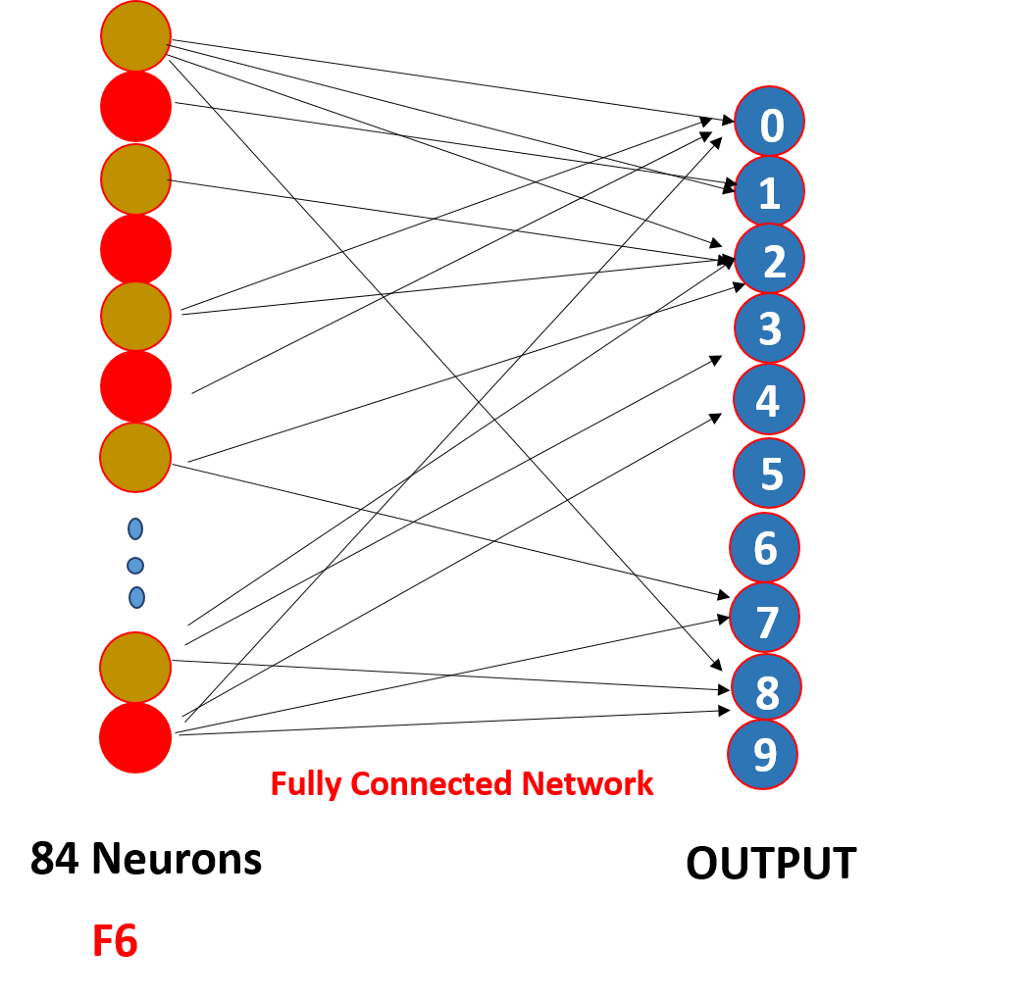

this code is only processing the first element of "train_data" and assigning its values to "X_train" and "y_train"

In [18]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [19]:
X_train.shape, y_train # ---> 4D: batch of 1 image

(torch.Size([1, 28, 28]), 5)

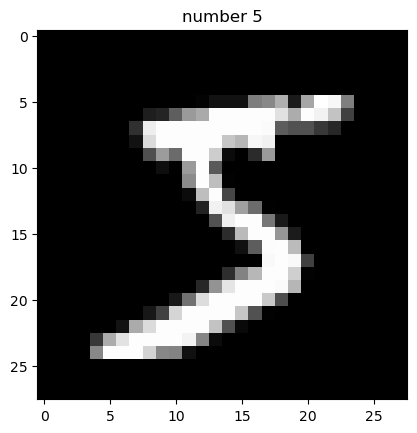

In [20]:
plt.imshow(X_train.view(28, 28), cmap = 'gray')
plt.title(f'number {y_train }')
plt.show()

In [21]:
### our train loader is getting batches of 10 images at a time hence 4D tensors hence .view()

In [22]:
x = X_train.view(1, 1, 28, 28)   # ---> 4D batch (batch of 1 image)

### performing the first Convolution

In [23]:
x = F.relu(conv1(x))

In [24]:
x.shape

torch.Size([1, 6, 26, 26])

we're loosing the border information because we did'nt add any padding 28 -> 26

In [25]:
x[0, 0].shape

torch.Size([26, 26])

## Plot each of the 6 filters

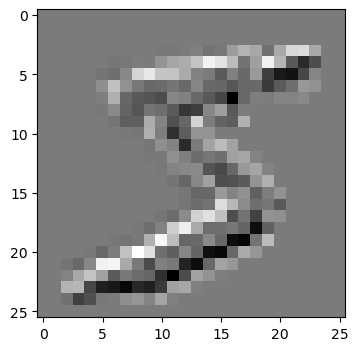

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.imshow(x[0, 0].view(26, 26).detach().numpy(), cmap = 'gray')

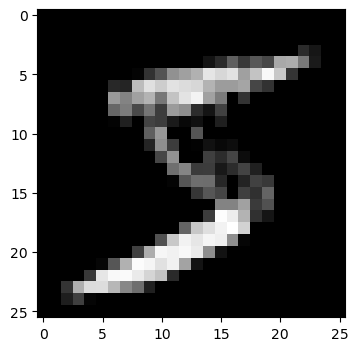

In [27]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.imshow(x[0, 3].view(26, 26).detach().numpy(), cmap = 'gray')
plt.show()

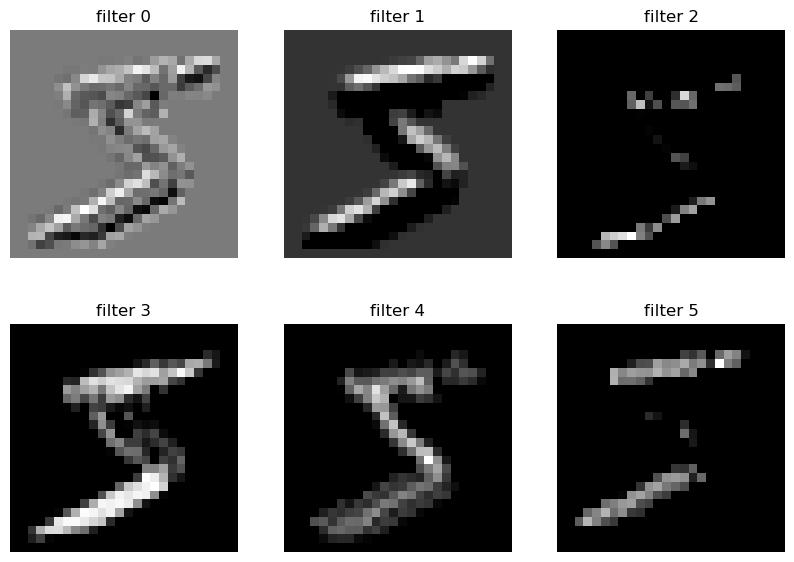

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
for i in range(2):
    for j in range(3):
        
        idx = i * 3 + j
        
        axs[i, j].imshow(x[0, idx].view(26, 26).detach().numpy(), cmap = 'gray')
        axs[i, j].set_title(f'filter {idx}')
        axs[i, j].axis('off')

plt.show()

In [29]:
# INPUT = 6: THE RESULT OF THAT CONV. LAYER
# KERNEL SIZE = 2
# STRIDE = 2

In [30]:
x = F.max_pool2d(input = x, kernel_size = 2, stride = 2)

In [31]:
x.shape

torch.Size([1, 6, 13, 13])

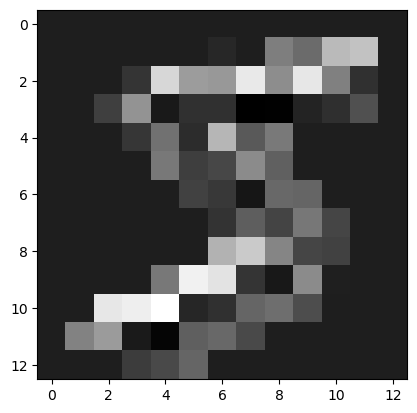

In [32]:
plt.imshow(x[0, 0].view(13, 13).detach().numpy(), cmap = 'gray')

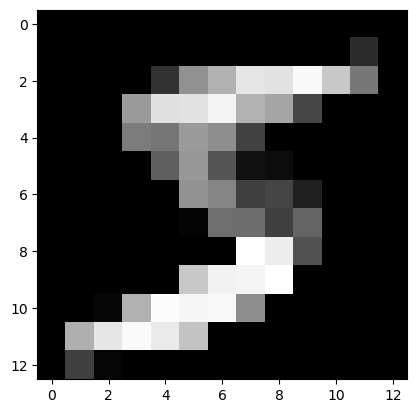

In [33]:
plt.imshow(x[0, 3].view(13, 13).detach().numpy(), cmap = 'gray')

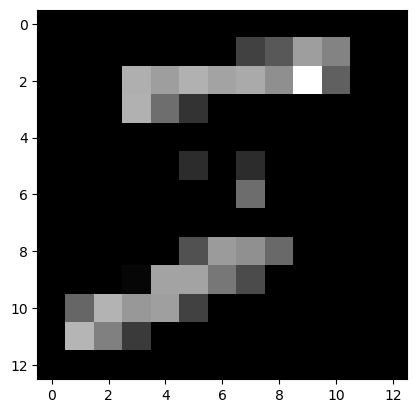

In [34]:
plt.imshow(x[0, 5].view(13, 13).detach().numpy(), cmap = 'gray')

# The image (information) is compressed

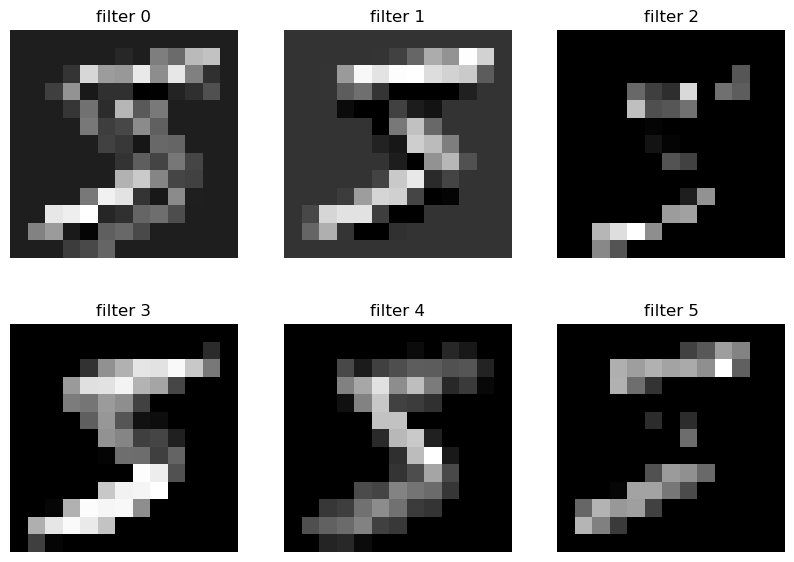

In [35]:
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
for i in range(2):
    for j in range(3):
        
        idx = i * 3 + j
        
        axs[i, j].imshow(x[0, idx].view(13, 13).detach().numpy(), cmap = 'gray')
        axs[i, j].set_title(f'filter {idx}')
        axs[i, j].axis('off')

plt.show()

In [36]:
x = F.relu(conv2(x))

In [37]:
x.shape

torch.Size([1, 16, 11, 11])

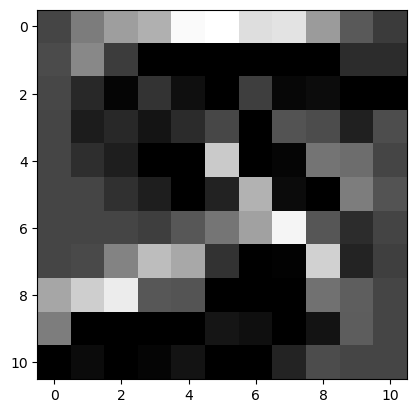

In [38]:
plt.imshow(x[0, 0].view(11, 11).detach().numpy(), cmap = 'gray')

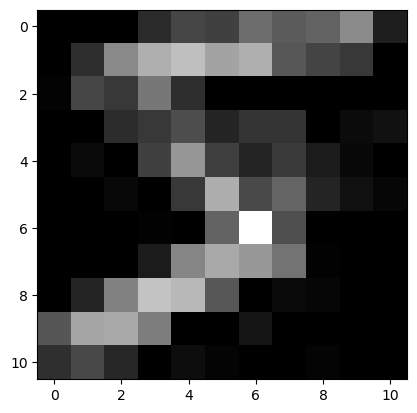

In [39]:
plt.imshow(x[0, 3].view(11, 11).detach().numpy(), cmap = 'gray')

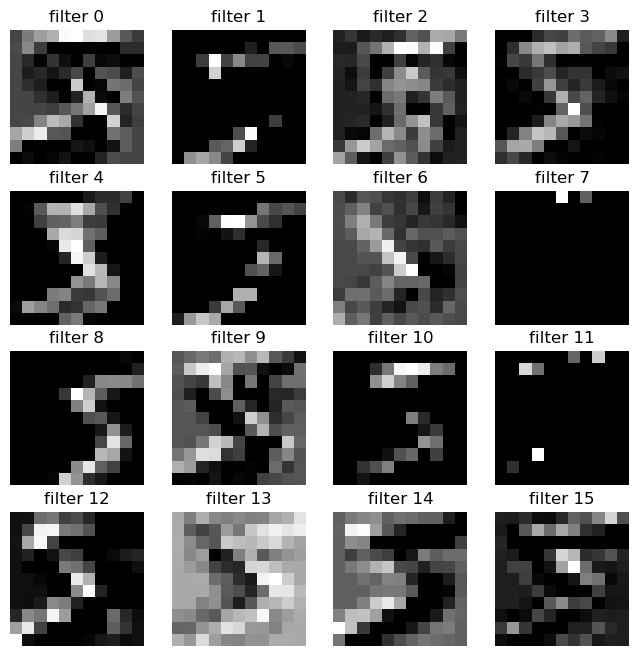

In [40]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        
        idx = i * 4 + j
        
        axs[i, j].imshow(x[0, idx].view(11, 11).detach().numpy(), cmap = 'gray')
        axs[i, j].set_title(f'filter {idx}')
        axs[i, j].axis('off')

plt.show()

In [41]:
x = F.max_pool2d(input = x, kernel_size = 2, stride = 2)

In [42]:
x.shape

torch.Size([1, 16, 5, 5])

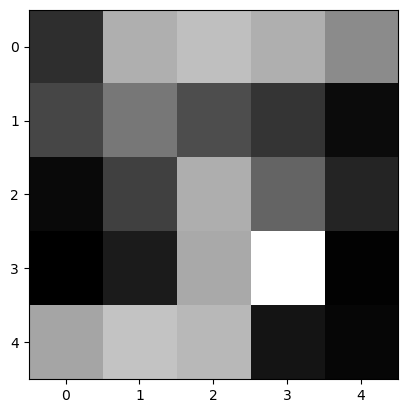

In [43]:
plt.imshow(x[0, 3].view(5, 5).detach().numpy(), cmap = 'gray')

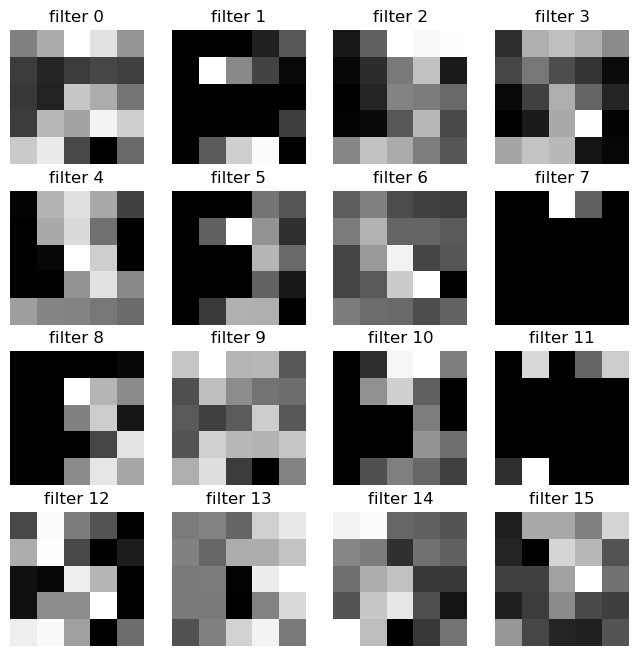

In [44]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        
        idx = i * 4 + j
        
        axs[i, j].imshow(x[0, idx].view(5, 5).detach().numpy(), cmap = 'gray')
        axs[i, j].set_title(f'filter {idx}')
        axs[i, j].axis('off')

plt.show()

## feeding this into a fully connected flat layer - flatterning out: no more need of 2D information and neighbor pixels intel

In [45]:
x.shape

torch.Size([1, 16, 5, 5])

In [46]:
(((28 - 2) / 2) - 2) / 2

5.5

the fully connected layer shape: 1 * 16 * 5 * 5

This is how the convolution output is passed into the fully connected layers.

In [47]:
x.view(-1, 16* 5* 5).shape # -1 for figuring out the batch size

torch.Size([1, 400])

## Building the whole model:

The "nn.Module" class in the PyTorch library is a base class in which neural network modules are defined. It provides a convenient way to encapsulate and organize different parts of a neural network into reusable modules. The class provides a number of methods, including "forward", which performs the forward pass of the module and returns an output tensor, and "parameters", which returns all the parameters of the module. Other methods include "zero_grad", which clears the gradients of all parameters in the module, and "cuda", which moves all module parameters to the GPU. The "nn.Module" class is typically subclassed when defining new neural network architectures in PyTorch.

In [56]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 3, stride = 1) # INPUT
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3, stride = 1)
        self.fc1 = nn.Linear(in_features = 5 * 5 * 16, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 84)
        self.fc3 = nn.Linear(in_features = 84, out_features = 10) # OUTPUT
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(input = X, kernel_size = 2, stride = 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(input = X, kernel_size = 2, stride = 2)
        X = X.view(-1, 5 * 5 * 16)    # FLATTENING IT
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        x = self.fc3(X)
        return F.log_softmax(X, dim =1)
        


In [92]:
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [93]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [94]:
par = 0
for param in model.parameters():
    par += param.numel()
    
par

60074

In [95]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [96]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed  

epoch:  0  batch:  600 [  6000/60000]  loss: 1.39981735  accuracy:  52.367%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 1.53306329  accuracy:  61.167%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 1.44996059  accuracy:  65.122%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 1.04375911  accuracy:  67.167%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 1.39746594  accuracy:  68.810%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 1.34602320  accuracy:  69.900%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 2.67585039  accuracy:  70.802%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 1.34192097  accuracy:  71.358%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 1.42958951  accuracy:  72.263%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 1.33070219  accuracy:  73.640%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.47005811  accuracy:  86.867%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.88869601  accuracy:  87.050%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 1.81118083  accuracy:  87.306%
epoch:  1  b

In [ ]:
plt.plot(torch.stack(train_losses).cpu().detach().numpy(), label= 'training loss')
plt.plot(torch.stack(test_losses).cpu().detach().numpy(), label= 'validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

## test data

In [207]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [208]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9886/10000 =  98.860%


In [210]:
# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[ 972    0    0    0    0    2    5    0    5    0]
 [   0 1134    3    3    0    0    1    2    0    2]
 [   0    0 1015    0    0    0    0    1    0    0]
 [   0    0    0  999    0   11    0    0    2    1]
 [   1    0    2    0  976    0    1    0    1   12]
 [   0    0    0    0    0  874    1    0    0    2]
 [   2    0    1    0    2    2  949    0    0    0]
 [   3    1    8    4    0    1    0 1021    3    1]
 [   0    0    2    3    0    0    1    1  957    2]
 [   2    0    1    1    4    2    0    3    6  989]]


In [211]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

114

In [212]:
# Display the first 10 index positions
misses[:10]

array([  18,  115,  264,  321,  326,  336,  340,  359,  412,  490],
      dtype=int64)

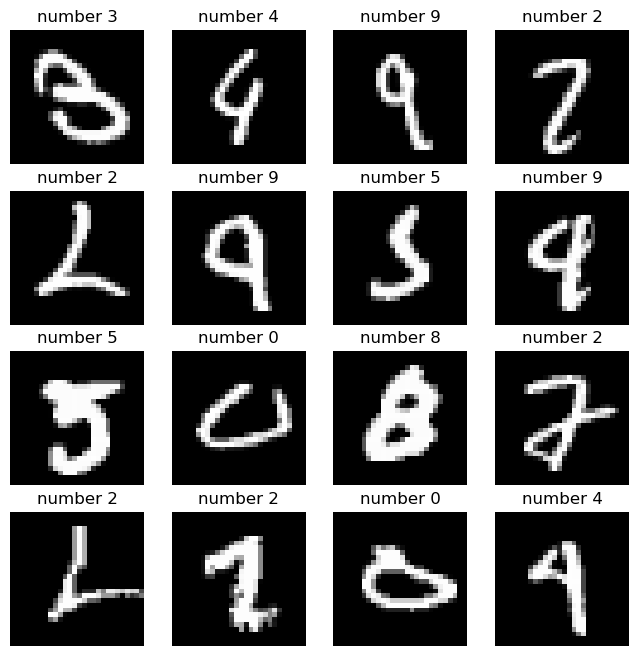

In [213]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))

for i in range(4):
    for j in range(4):
        # Index of the test example to display
        
        idxx = misses[:16]
        idx = i * 4 + j
        
        axs[i, j].imshow(test_data[idxx[idx]][0].view(28, 28), cmap='gray')
        axs[i, j].set_title(f'number {test_data[idxx[idx]][1]}')
        axs[i, j].axis('off')
        
plt.show()